#Menyiapkan Library

In [38]:
import tensorflow as tf
import keras
from keras import optimizers
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import numpy as np

#menyiapkan Datasets Cifar10
50 rb training sample, ukuran image 32 x 32 pixel dan 3 channel warna (R,G,B),
10 rb test sample, ukuran image 32 x 32 pixel dan 3 channel warna (R,G,B)

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
#buat class seperti pada dataset
classes=['pesawat','mobil','burung','kucing','rusa','anjing','katak','kuda','kapal','truk']

In [8]:
classes[9]

'truk'

In [9]:
#buat function untuk cek gambar dan class labelnya
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
  

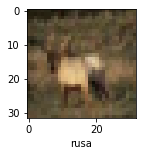

In [10]:
#contoh terapan
plot_sample(X_train,y_train,3)

In [11]:
#normalisasi value untuk mendapatkan nilai 0 sampai 1 dengan mmembaginya dengan 255
X_train=X_train/255
X_test=X_test/255

#ANN 
Training dan evaluation menggunakan simple ANN

In [14]:
#model dan training
ann=models.Sequential([
      keras.layers.Flatten(input_shape=(32,32,3)),
      keras.layers.Dense(3000, activation='relu'),
      keras.layers.Dense(1000, activation='relu'),
      keras.layers.Dense(10,activation='sigmoid')                  
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8085 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6219 - accuracy: 0.4269
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5392 - accuracy: 0.4579
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4811 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4311 - accuracy: 0.4953


#CNN
Training dan Evaluuation menggunakan CNN

In [39]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [49]:
cnn.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [50]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6330 - accuracy: 0.7808
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6216 - accuracy: 0.7883
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6121 - accuracy: 0.7888
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6018 - accuracy: 0.7939
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5909 - accuracy: 0.7979
